# Model Evaluation - English 1

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzer import DataAnalyzer
from model_evaluator import ModelEvaluator
from model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mflod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mflod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mflod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [2]:
FRENCH_PREPROCESSED_DATA_PATH = "japanese_data"

In [3]:
data_json = pd.read_json(FRENCH_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [4]:
dataset_1 = data_json.loc[data_json['label'] == 1]
dataset_0 = data_json.loc[data_json['label'] == 0]

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [5]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [6]:
COVID_MODEL_V1_PATH = "japanese/cl-tohoku-bert-base-japanese"

In [7]:
model_covid_v1 = Model.load_saved_model(COVID_MODEL_V1_PATH, useGPU=False)

Some layers from the model checkpoint at japanese/cl-tohoku-bert-base-japanese were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at japanese/cl-tohoku-bert-base-japanese.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   0.99812
Precision:  0.99719
Recall:     0.99859
F1 score:   0.99789




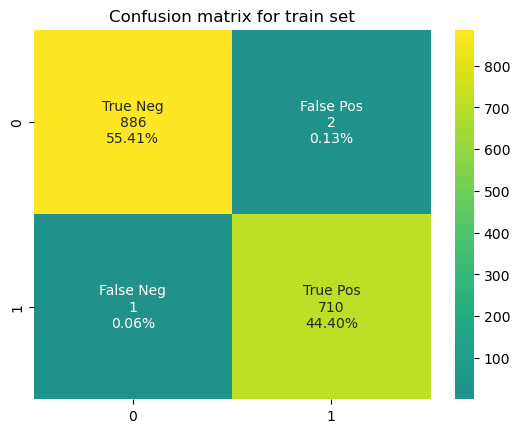

([0.99812, 0.99719, 0.99859, 0.99789],
 [0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
 

In [8]:
ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.9975
Precision:  0.99401
Recall:     1.0
F1 score:   0.997




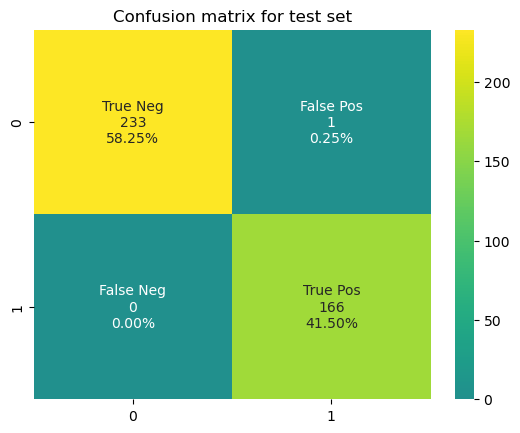

In [9]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=test_data,
    set_type="test"
)

In [10]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [11]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

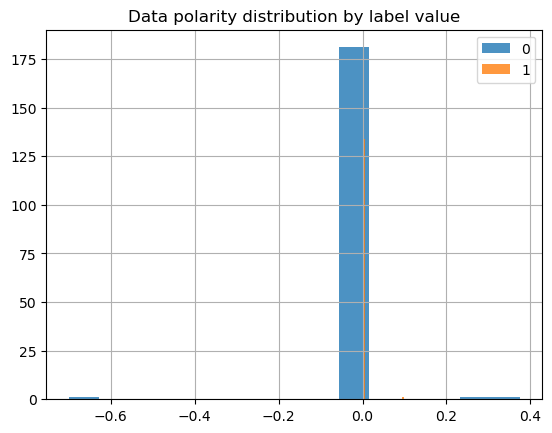

In [12]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

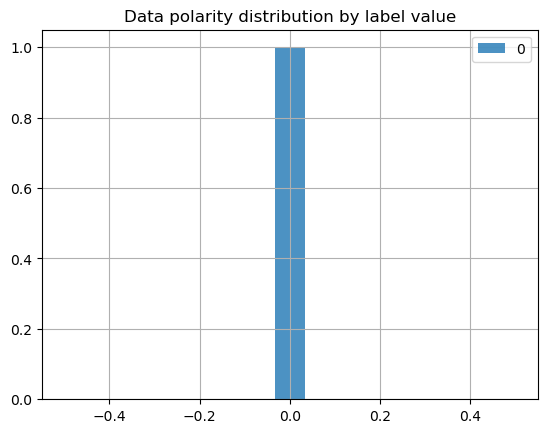

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

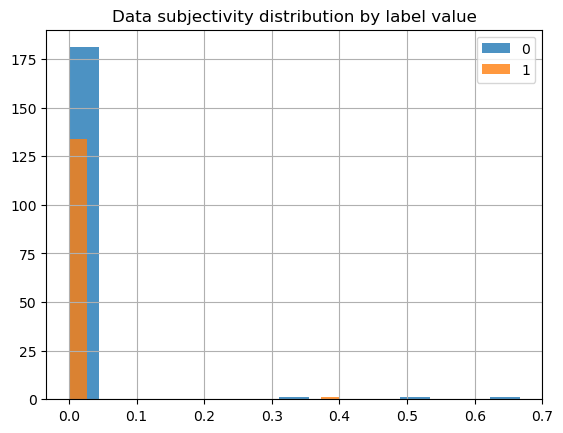

In [14]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

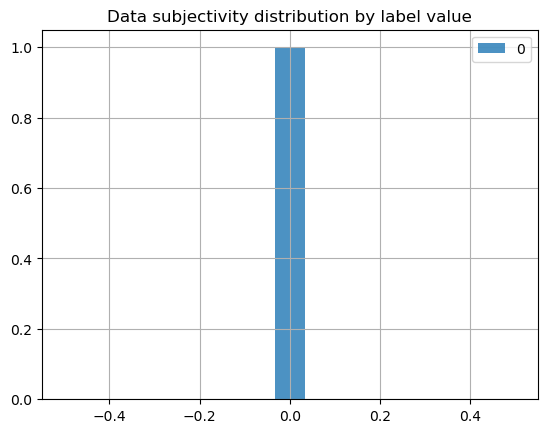

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [16]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

In [17]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

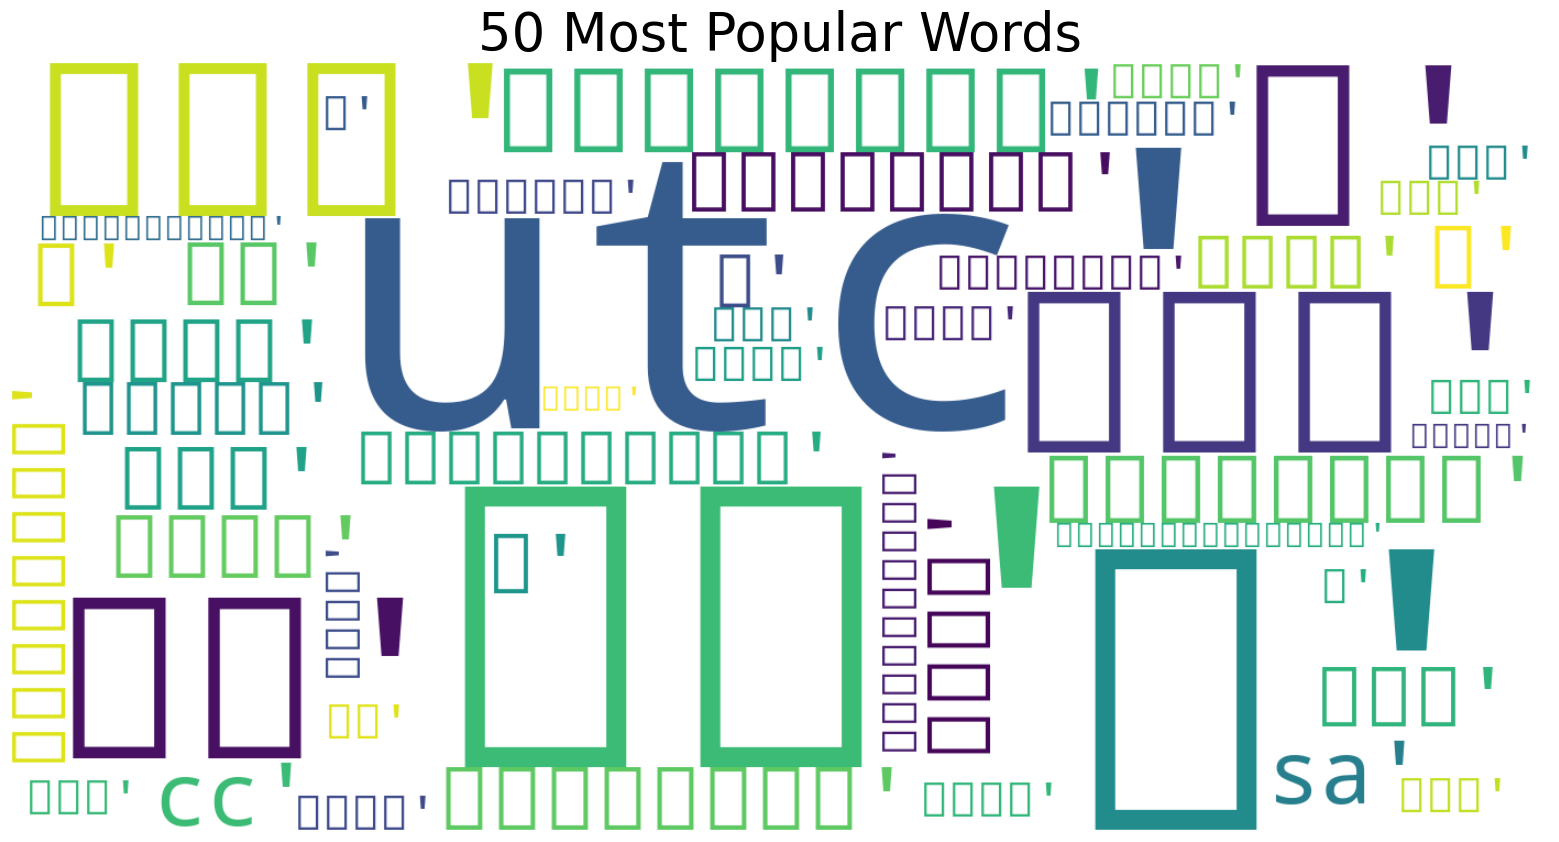

In [18]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

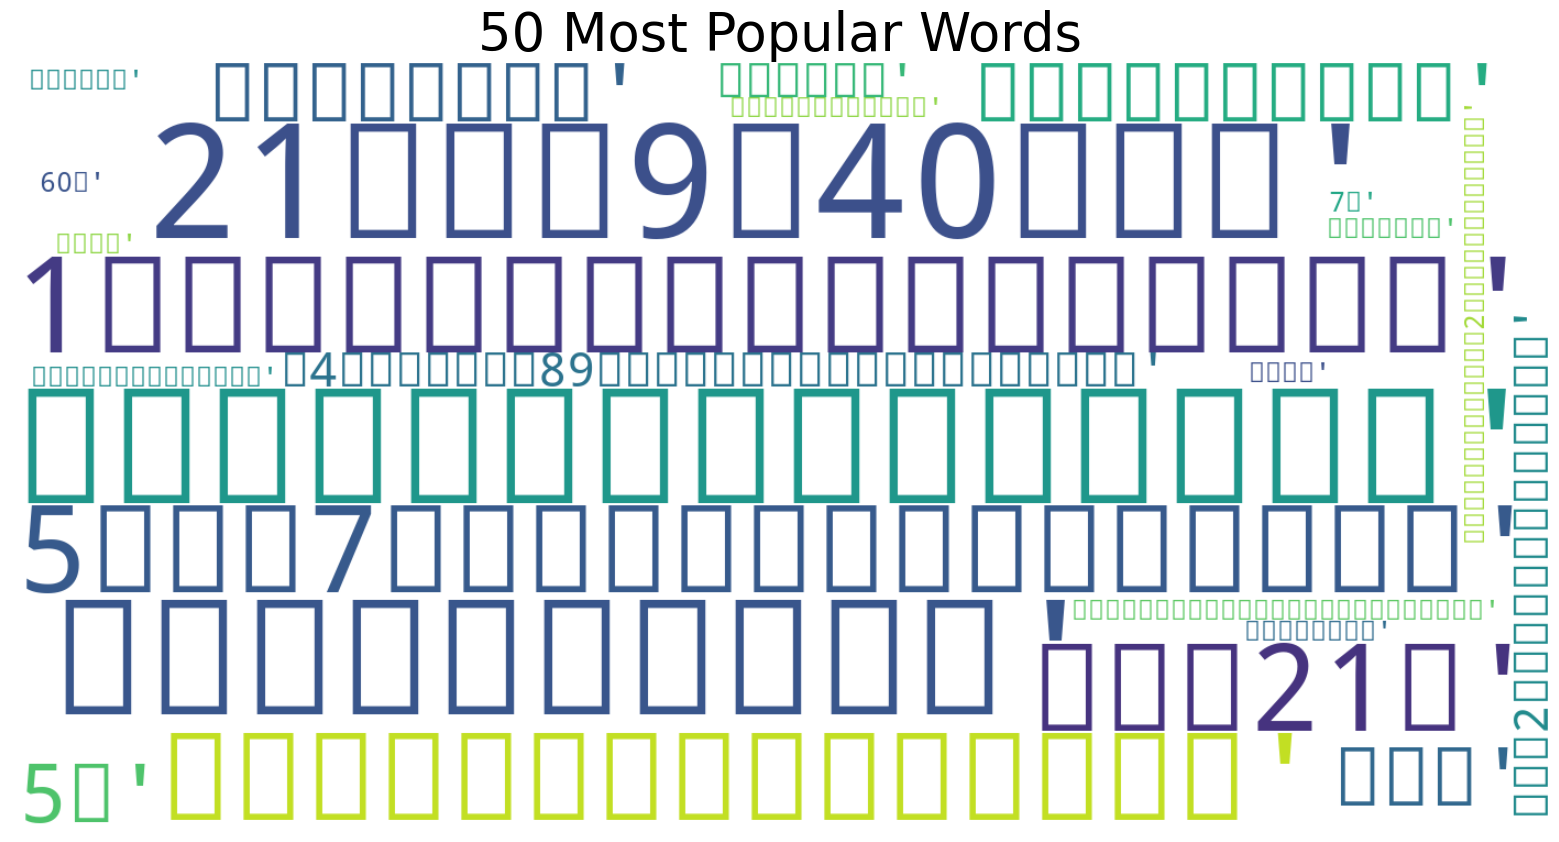

In [19]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12414 (\N{HIRAGANA LETTER MA}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font

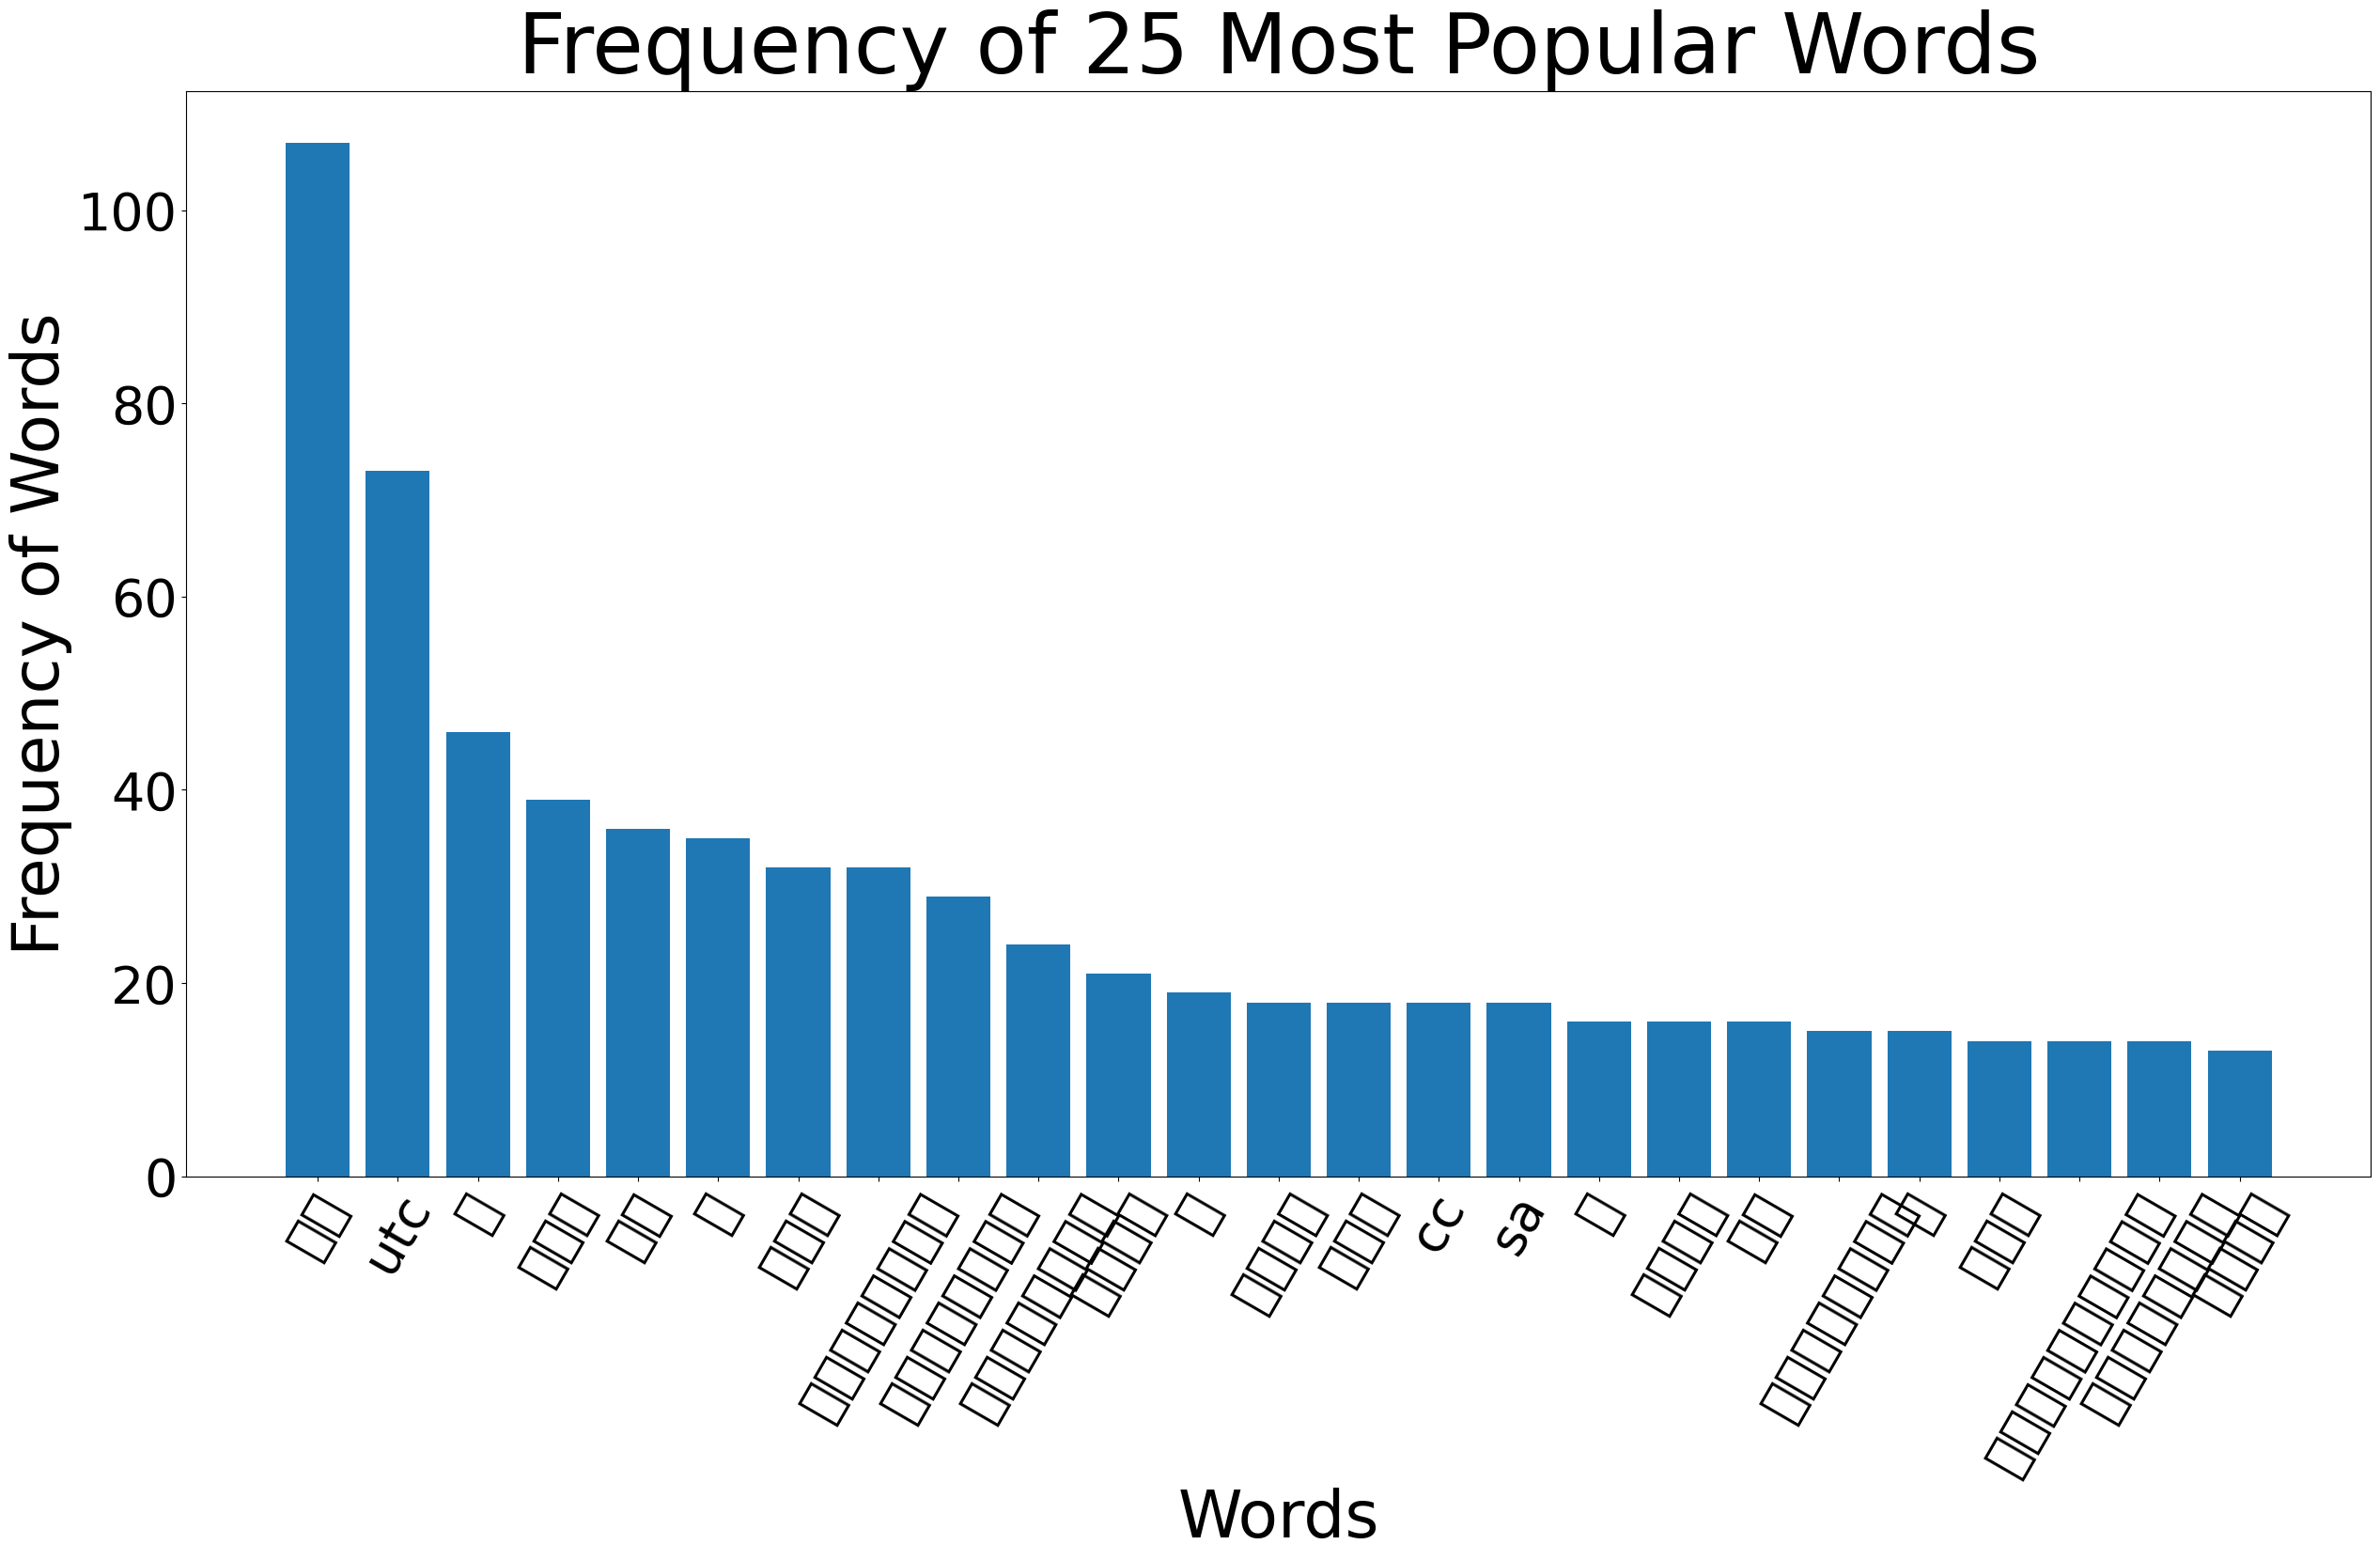

In [20]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28168 (\N{CJK UNIFIED IDEOGRAPH-6E08}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21320 (\N{CJK UNIFIED IDEOGRAPH-5348}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12429 (\N{HIRAGANA LETTER RO}) missing from current font.
  func(*args, **kwargs)
c:\Users\mflod\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-

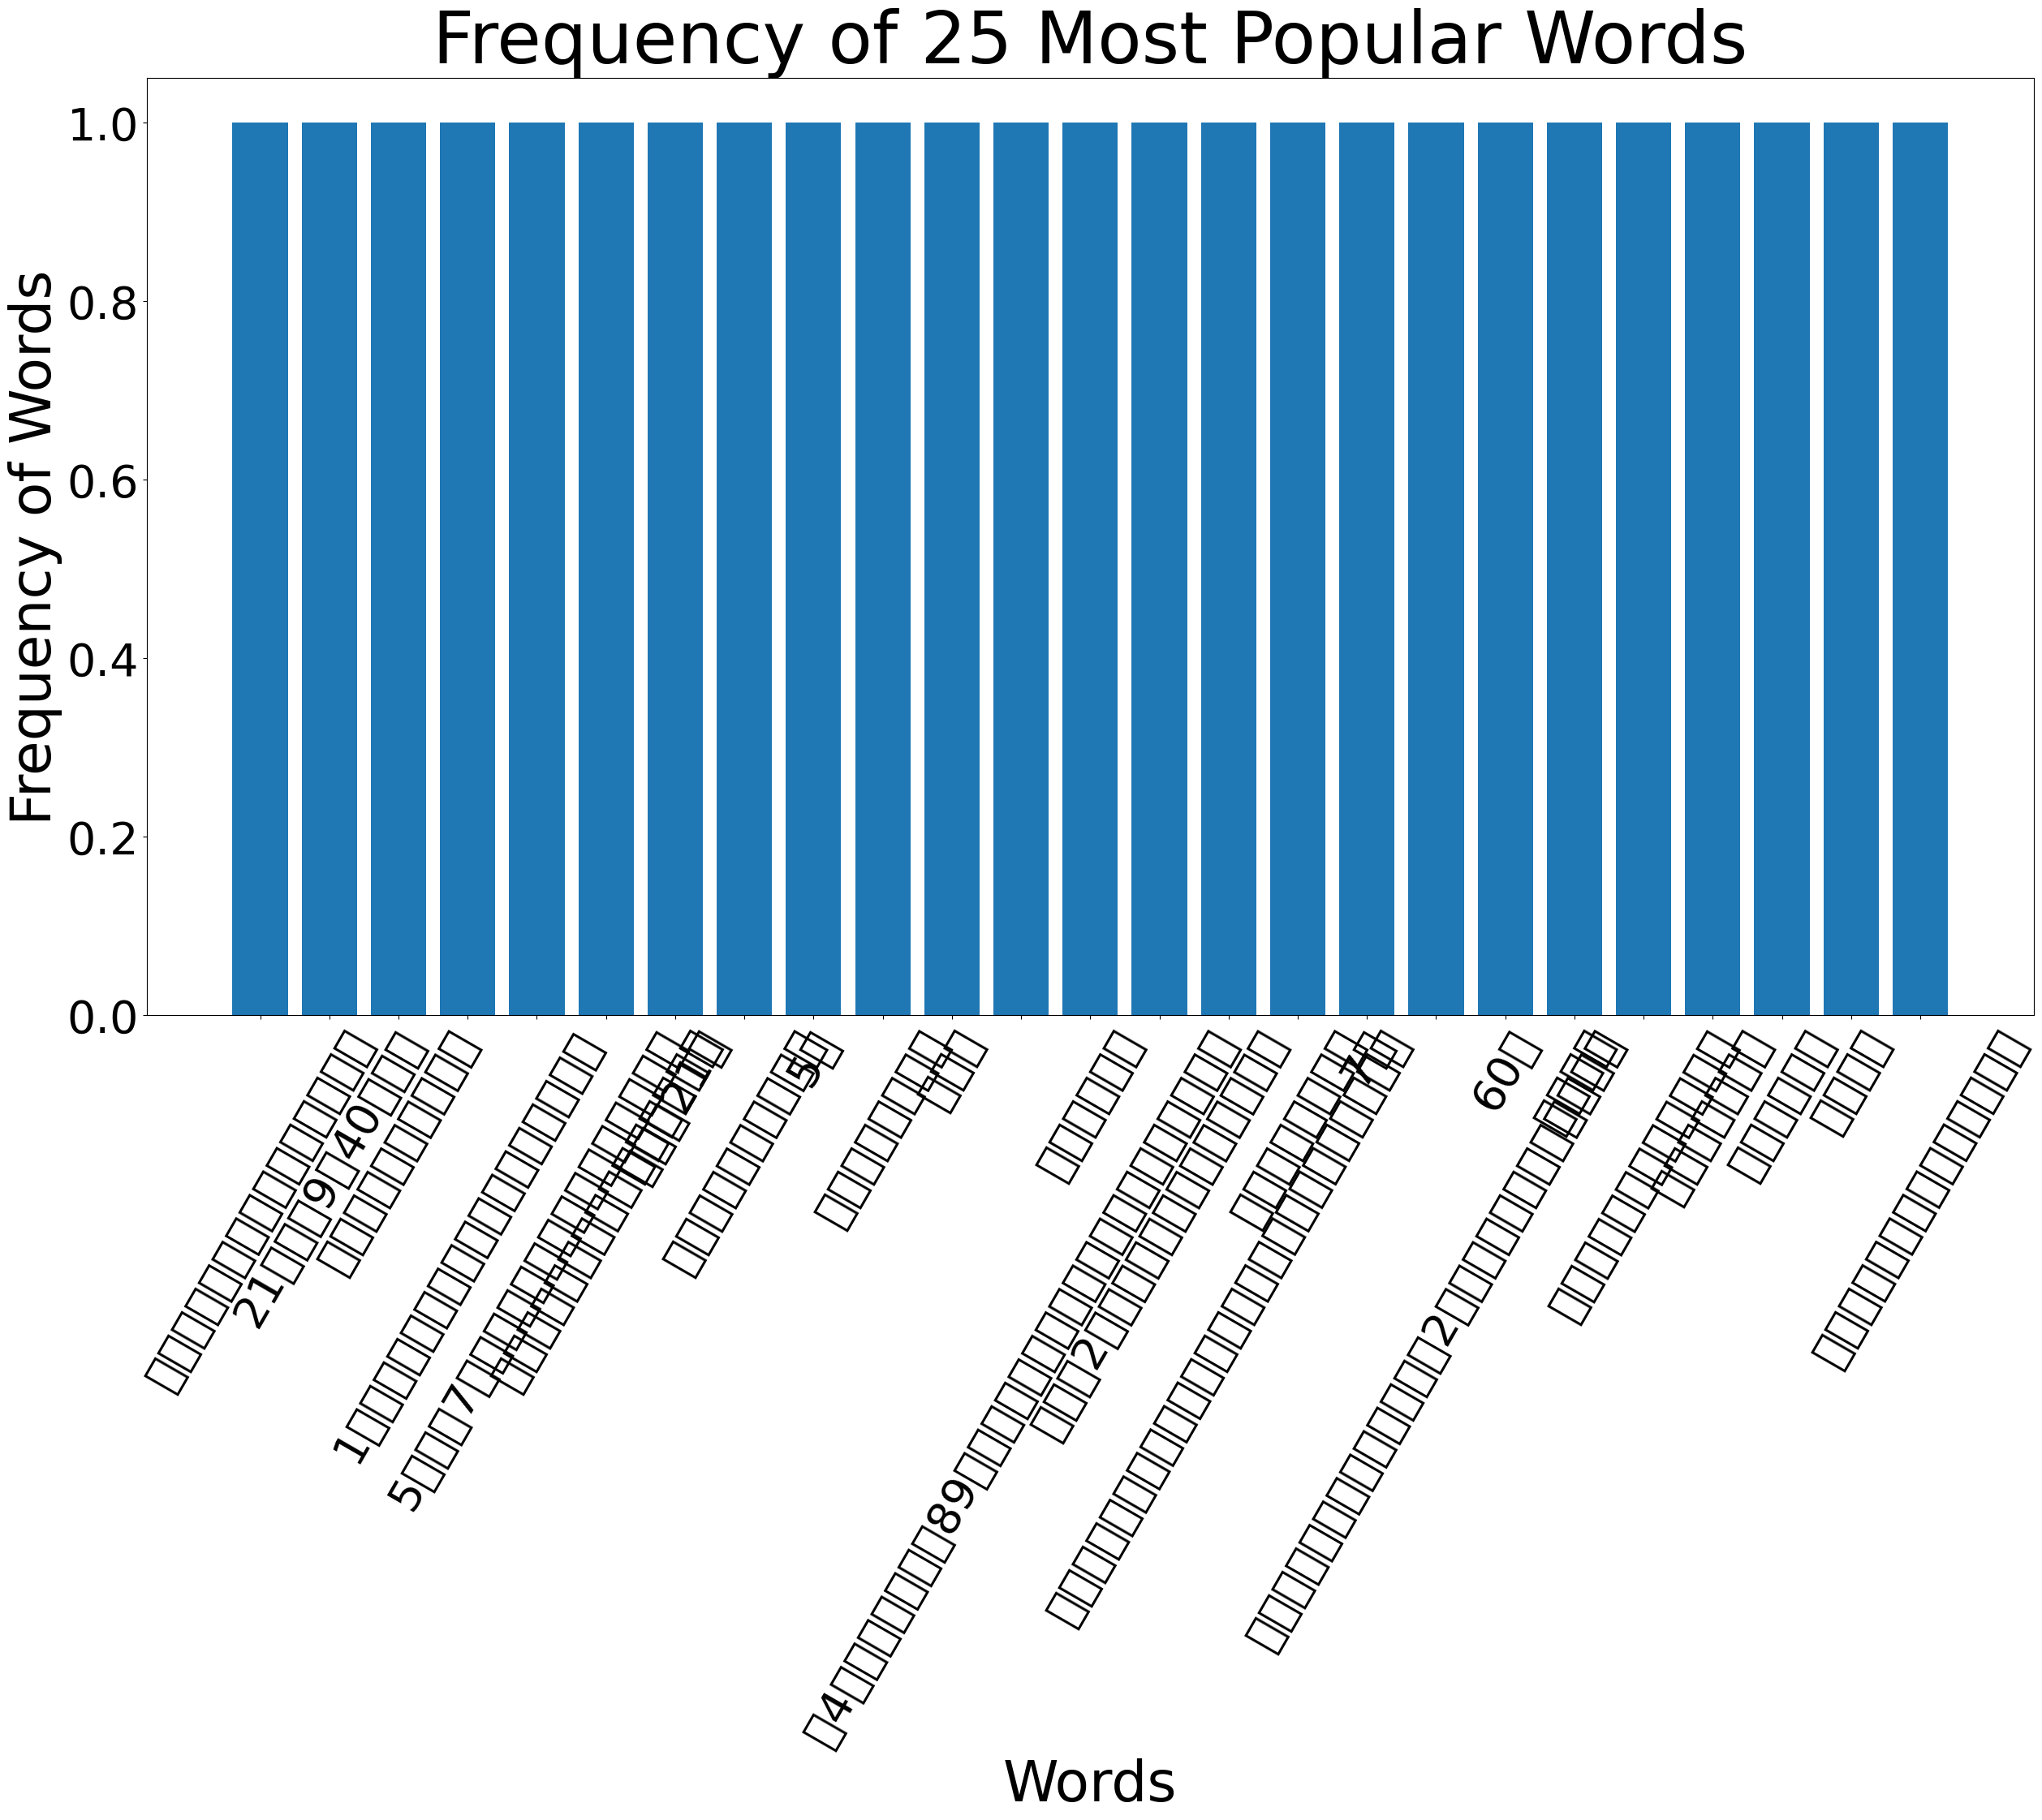

In [21]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)